# Supervised Learning - Breast Cancer prediction

## Introduction

### About the Dataset
The dataset of this project is from [Kaggle's Breast Cancer Data Page](https://www.kaggle.com/datasets/adhamelkomy/breast-cancer). The dataset includes a variety of features computed from the images, including measurements of cell shape, texture, and size, as well as information about the patient's age and final diagnosis (benign (B) or malignant (M)).

### About the Problem
The aim of this project is to forecast whether a cancer biopsy indicates a benign or malignant condition. It involves a binary classification task, with the diagnosis serving as the target variable, denoted as either benign or malignant.

### Solution
To tackle this issue, we'll employ a supervised learning approach, using the dataset outlined previously. We'll train a model using the training set and subsequently assess its performance using the test set. Evaluation will be based on the accuracy metric, representing the proportion of accurate predictions made by the model.

This project was made by:

| Student                 | number      | email                     |
|-------------------------|-------------|---------------------------|
| André Dantas Rogrigues  | 202108721   | up202108721@edu.fe.up.pt  |
| Inês Martin Soares      | 202108852   | up202108852@edu.fe.up.pt  |

## Import Libraries

Before we import the libraries for this project, we need to install the tools that we will need. For that, we just need to run on the terminal the following command:

- "pip install -r requirements.txt"

Now the imports:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

### First Analysis and peprocessing

The initial analysis and preprocessing involve reading the data, removing unnecessary columns, converting categorical data to numerical data for easier analysis, and ensuring there are no missing values.

In [2]:
bc_data = pd.read_csv('data.csv')

bc_data = bc_data.drop(columns = ['id']) #id not needeed

mapping = {'M': 1, 'B': 0}
to_describe_bc_data = bc_data.copy()
to_describe_bc_data['diagnosis'] = to_describe_bc_data['diagnosis'].map(mapping)

#no null values
bc_data.isnull().count()

diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave_points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave_points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave_points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

In [3]:
to_describe_bc_data.describe() #more benign (mean closer to 0) (se calhar removemos usando as tecnicas dos slides)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Correlation analysis

The code below performs a correlation analysis to understand the relationship between the diagnosis and the other features and the resulting coefficients indicate how strongly they are associated. They are visualized in a heatmap, where the color intensity represents the strength of the correlation. Lastly, there is a refinement of the Data set to include only the most relevent features for this project.

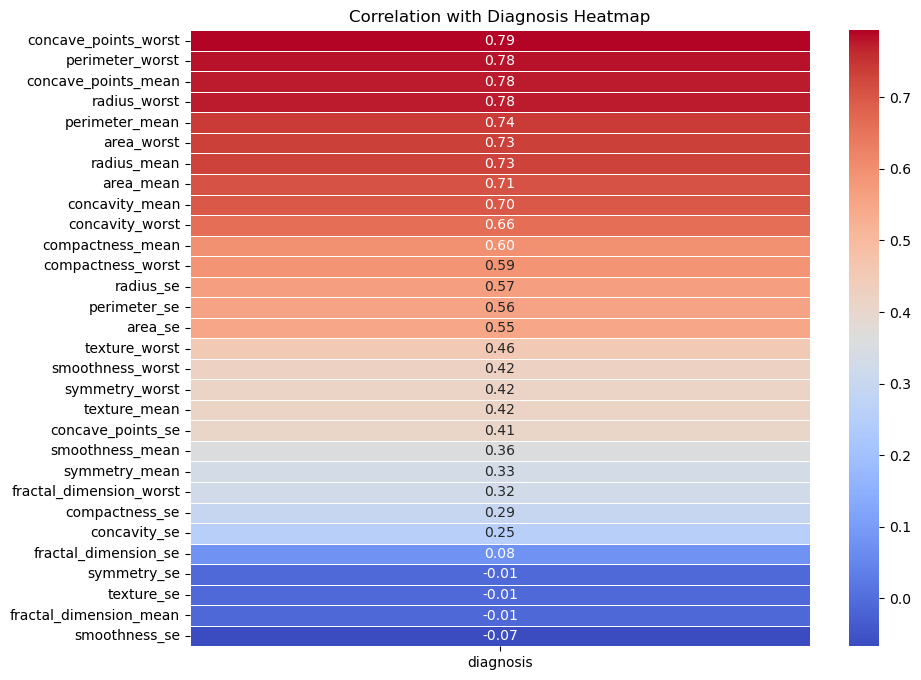

In [4]:
corr_data = to_describe_bc_data.corr()
diagnosis_correlation = corr_data['diagnosis'].drop('diagnosis').sort_values(ascending=False).to_frame()

plt.figure(figsize=(10, 8))
sns.heatmap(diagnosis_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with Diagnosis Heatmap')
plt.show()

In [5]:
#we will use only columns with more or equal to 0.7
cleaned_bc_data = bc_data.copy()[['diagnosis', 'concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean']]

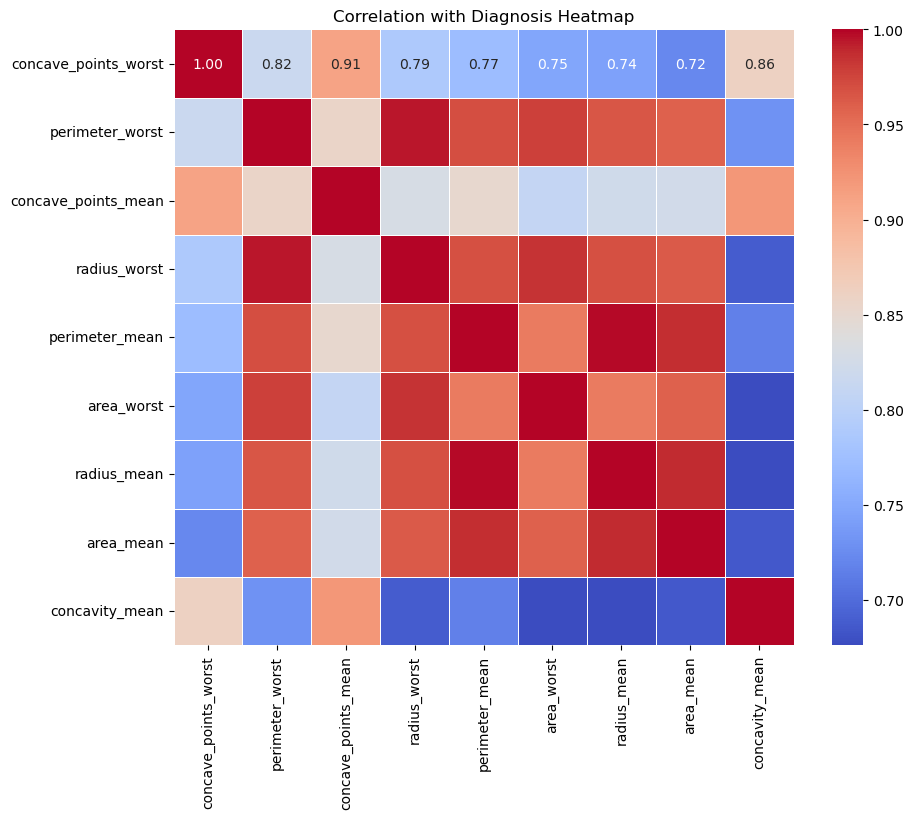

In [6]:
corr_data_clean = cleaned_bc_data.drop(columns=['diagnosis']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with Diagnosis Heatmap')
plt.show()

In [7]:
# Removing similar columns (mainly ..._worst to perimeter_worst and ..._mean to perimeter mean)

corr_data_clean =  bc_data.copy()[['diagnosis', 'concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'perimeter_mean', 'concavity_mean']]

In [8]:
selected_columns = cleaned_bc_data.columns

# Creating a subset DataFrame with selected columns
bc_subset = bc_data[selected_columns].sample(250)

In [9]:
def train_classifier(clf, all_inputs, all_labels):
    train_accuracies = []
    test_accuracies = []
    
    for repetition in range(1000):
        (training_inputs,
         testing_inputs,
         training_classes,
         testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

        scaler = StandardScaler()
        training_inputs = scaler.fit_transform(training_inputs)
        testing_inputs = scaler.transform(testing_inputs)
        
        clf.fit(training_inputs, training_classes)
    
        train_predict = clf.predict(training_inputs)
        test_predict = clf.predict(testing_inputs)
        
        train_accuracy = accuracy_score(training_classes, train_predict)
        test_accuracy = accuracy_score(testing_classes, test_predict)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(train_accuracies, bins=10, edgecolor='black')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Distribution of Training Accuracies')
    
    plt.subplot(1, 2, 2)
    plt.hist(test_accuracies, bins=10, edgecolor='black')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Distribution of Testing Accuracies')
    
    plt.show()

    return [testing_classes, test_predict]

In [10]:
def conf_matrix_display(last_result):
    conf_matrix = confusion_matrix(last_result[0],last_result[1])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [11]:
all_inputs = cleaned_bc_data.drop(columns=['diagnosis']).values
all_labels = bc_data['diagnosis'].values

### Desicion Tree Classifier

Decision Trees models decisions and their possible consequences as a tree structure, where internal nodes represent tests on features, branches represent the outcome of the tests, and leaf nodes represent class labels or regression values.

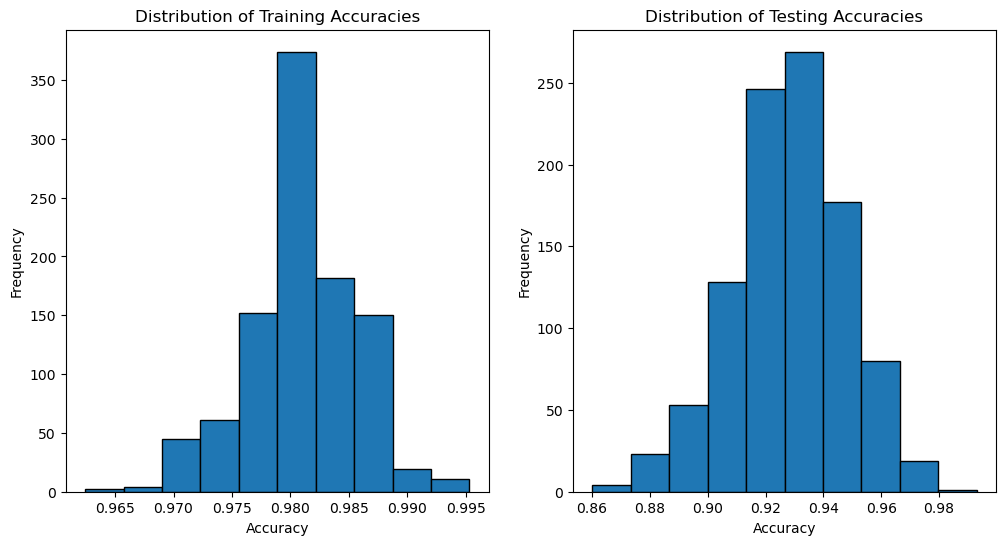

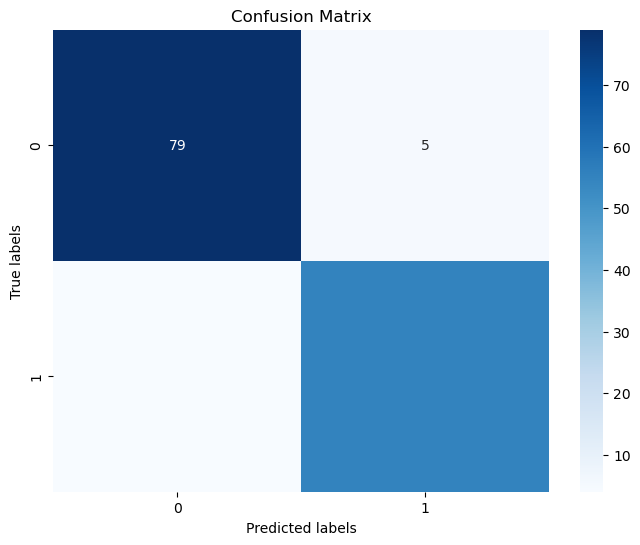

In [12]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2)

last_result_clf = train_classifier(clf, all_inputs, all_labels)

conf_matrix_display(last_result_clf)

### SVM Classifier

Support Vector Machines are often used for classification and regression tasks. They are particularly effective in high-dimensional spaces and are known for their robustness and efficiency.

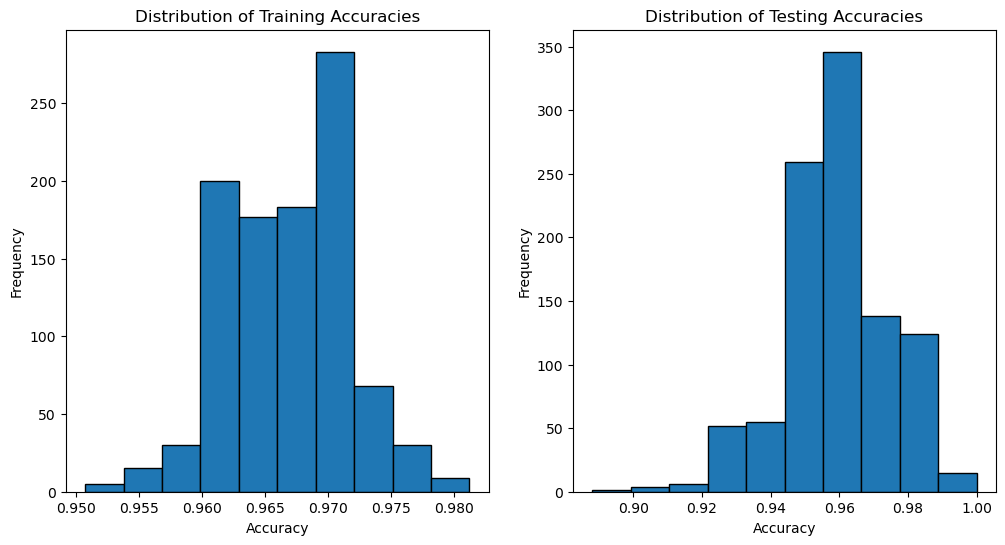

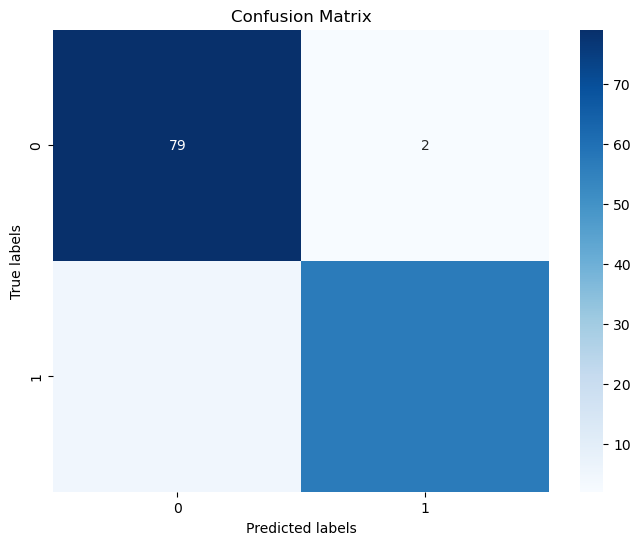

In [13]:
svm_classifier = SVC(kernel='linear')

last_result_svm = train_classifier(svm_classifier, all_inputs, all_labels)

conf_matrix_display(last_result_svm)

### Neural Networks Classifier

Neural networks are inspired by the human brain, consisting of layers of processing nodes, which are organized into layers: an input layer, one or more hidden layers and an output layer. Each node in a layer is connected to nodes in the next layer through weights, which are adjusted during training to learn patterns in the data.

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

last_result_nn = train_classifier(nn, all_inputs, all_labels)

conf_matrix_display(last_result_nn)

### Model Training Comparison



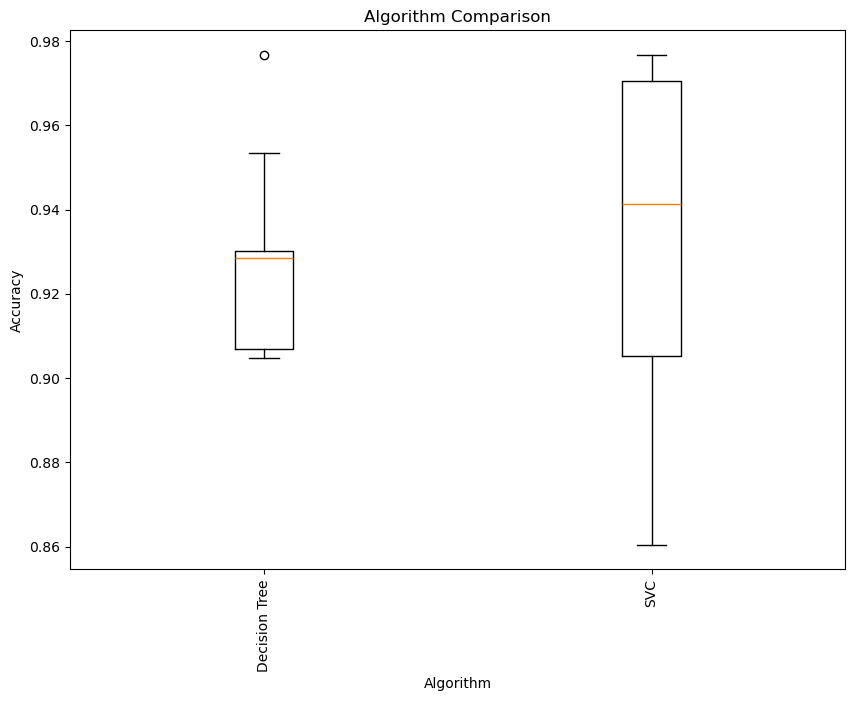

In [15]:
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=42)

def compare_models():
    models = []
    models.append(('Decision Tree', clf))
    models.append(('SVC', svm_classifier))
    models.append(('Neural Networks', nn))
    
    results = []
    names = []
    scoring = 'accuracy'
    
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        
    plt.figure(figsize=(10,7))
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')

    # swap the axes
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)

    plt.show()

compare_models()

### Select the best Classifier

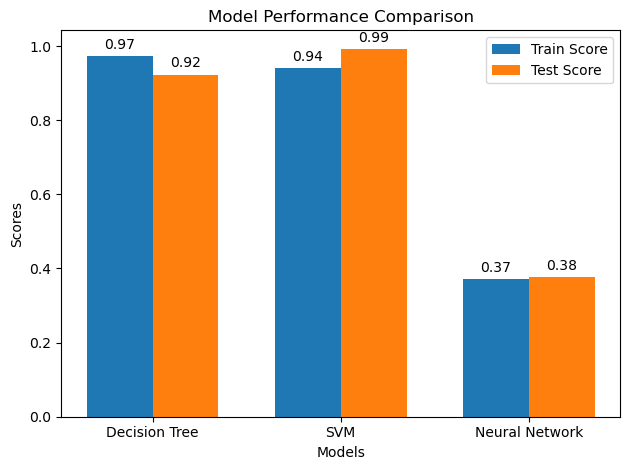

In [33]:
modelDT = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2)
modelDT.fit(X_train, y_train)

modelSVC= SVC(kernel='linear')
modelSVC.fit(X_train, y_train)

modelNN = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
modelNN.fit(X_train, y_train)

train_scores = {
    'Decision Tree': modelDT.score(X_train, y_train),
    'SVM': modelSVC.score(X_train, y_train),
    'Neural Network': modelNN.score(X_train, y_train)
}

test_scores = {
    'Decision Tree': modelDT.score(X_test, y_test),
    'SVM': modelSVC.score(X_test, y_test),
    'Neural Network': modelNN.score(X_test, y_test)
}

labels = list(train_scores.keys())
train_values = list(train_scores.values())
test_values = list(test_scores.values())

x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35

bars1 = ax.bar(x, train_values, bar_width, label='Train Score')
bars2 = ax.bar([p + bar_width for p in x], test_values, bar_width, label='Test Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

fig.tight_layout()

plt.show()


With this results, we conclude that SVM and Decision Tree are the best option, although SVM is better when faced with new data.